### Data set A
Bank Additional dataset that classifies whether client subscribed to the term deposit or not

### Preprocessing Steps:
- There were few 'unknown' values which were replaced by mode. The reason we did not replace by mean is because there are 'unknown' values in categorical data as well, which cannot be replaced with the mean. Therefore, mode is the best choice for replacing unknown values for this dataset.
- There are few outliers in the data. We have removed the outliers and replaced with mean to check which type of imputation helped with giving better modeol performance. Removing outliers improved the accuracy of the classifiers.
- We used z-score as a standardization step to convert the data to same scale.
- We have also replaced the categorical values with numerical values as explained below.

In [2]:
import pandas as pd
import math
from sklearn import preprocessing as pp
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
#installed imblearn package
import imblearn.under_sampling as us
import imblearn.over_sampling as os
from sklearn.metrics import classification_report,accuracy_score
bank_data=pd.read_csv("data/bank-additional.csv",sep=";")
bank_data_cast=bank_data.copy()
#changing datatype from 'object' to 'category' to label the categorical data
for i in bank_data_cast.select_dtypes(include=['object']).columns:
    bank_data_cast[i]=bank_data_cast[i].astype('category')
#print(bank_data_cast.head(20))
#print(bank_data_cast.shape)
bank_data_cast.replace('unknown', np.nan, inplace= True)
#print(bank_data_cast.isnull().sum())
#Preprocessing data having 'Unknown' values to mode
bank_data_cast['default'].fillna(bank_data_cast['default'].mode()[0], inplace=True)
bank_data_cast['housing'].fillna(bank_data_cast['housing'].mode()[0], inplace=True)
bank_data_cast['loan'].fillna(bank_data_cast['loan'].mode()[0], inplace=True)
bank_data_cast['job'].fillna(bank_data_cast['job'].mode()[0], inplace=True)
bank_data_cast['marital'].fillna(bank_data_cast['marital'].mode()[0], inplace=True)
bank_data_cast['education'].fillna(bank_data_cast['education'].mode()[0], inplace=True)
#print(bank_data_cast.head(20))
bank_data_cast['age'].value_counts()
oversampled_data = os.SMOTE(random_state=0)
undersampled_data = us.ClusterCentroids(random_state=0)

    age            job   marital            education  default  housing  \
0    30    blue-collar   married             basic.9y       no      yes   
1    39       services    single          high.school       no       no   
2    25       services   married          high.school       no      yes   
3    38       services   married             basic.9y       no  unknown   
4    47         admin.   married    university.degree       no      yes   
5    32       services    single    university.degree       no       no   
6    32         admin.    single    university.degree       no      yes   
7    41   entrepreneur   married    university.degree  unknown      yes   
8    31       services  divorced  professional.course       no       no   
9    35    blue-collar   married             basic.9y  unknown       no   
10   25       services    single             basic.6y  unknown      yes   
11   36  self-employed    single             basic.4y       no       no   
12   36         admin.   

C:\Users\jatin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEB02CF550>,
      dtype=object)

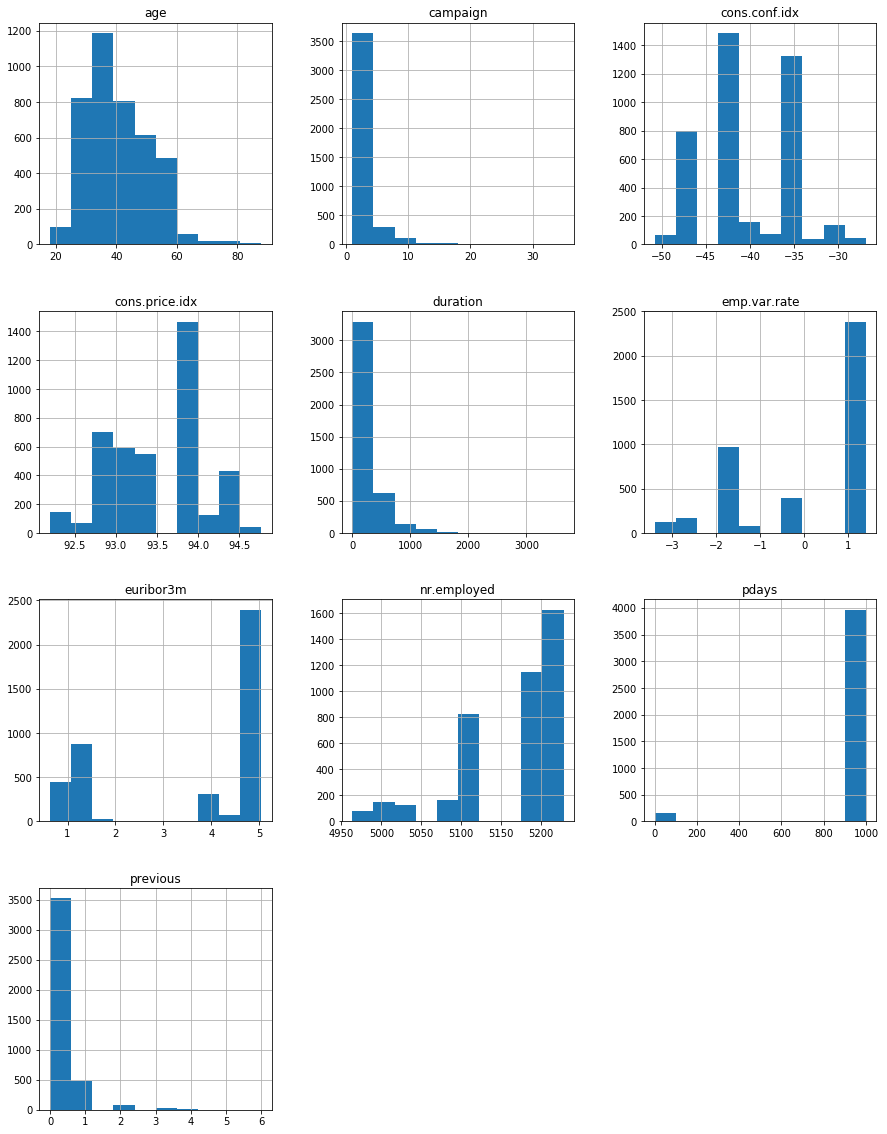

In [6]:
# plot the data to see the distribution
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
bank_data_cast.hist(ax=ax)

### Task1 Changing categorical data into numerical features 
- get_dummies method from the pandas library has been used for converting categorical data to numerical

In [7]:
data_dummies=pd.get_dummies(bank_data_cast)
data_dummies.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,1,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,0,1,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,1,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,1,0,0,0,0,0,1,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,0,0,1,0,1,0


### Task 2. Data Split Ration and Justification
We split data into training and testing data. Here, testing and training ratio is kept as 20:80. There is no particular rule for deciding the split ratio and it is a parameter that depends on the dataset. Therefore, for our dataset, we evaluated our models on different splits and found that classifiers have better performance for the chosen ratio of test-train split.
**Justification**
F1-scores on *default* models -
1. **20:80 split ratio**
  <br>Decision Tree - 89% , Random Forest - 91% , Neural Network - 93%
2. 25:75 split ratio  
  </n>Decision Tree - 88% , Random Forest - 91%, Neural Network - 90%
3. 30:70 split ratio
  <br>Decision Tree - 88% , Random Forest - 92% , Neural Network - 90%

### Normalization and Outlier Detection

In [8]:
#zscore normalisation
data_dummies_z = pd.DataFrame(stat.zscore(data_dummies),columns=data_dummies.columns)
data_dummies_z = data_dummies_z.drop(['job_unknown','marital_unknown','education_unknown','default_unknown','housing_unknown','loan_unknown',],axis=1)
data_dummies_z.iloc[:,-1] = data_dummies.iloc[:,-1]

#remove outliers
df = data_dummies_z.iloc[:,:10]
z = stat.zscore(df)
z = pd.DataFrame(z, columns=df.columns)
for col in z.columns:
    z = z.loc[z[col] < 3]
    z = z.loc[z[col] > -3]

index_removed = set(data_dummies_z.index) - set(z.index)
outlier_removed = data_dummies_z.drop(index_removed, axis=0)
print(outlier_removed.shape)
x_train,x_test,y_train,y_test=train_test_split(outlier_removed.iloc[:,:-2],outlier_removed.iloc[:,58:59], test_size=0.20, random_state=21)

(3717, 59)


C:\Users\jatin\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


## Task 3.Classification using Decision Tree(DT), Random Forest(RF) and Neural Network(MLPs)
In this assignment we have used three techniques(DT,RF,NN/MLPs) to work on same classification problem for bank dataset.
Given below is the brief description of algorithms used in our assignment:

### 1. Decision Trees -CART
CART stands for Classification and Regression Trees. For this assignment we have used Scikit-Learn library which by default used CART algorithm. 

<b>CART Algorithm Steps</b>
Decision Tree building algorithm involves a few simple steps and these are:
<p>1. Take Labelled Input data - with a Target Variable and a list of Independent Variables</p>
<p>2. Best Split: Find Best Split for each of the independent variables</p>
<p>3. Best Variable: Select the Best Variable for the split</p>
<p>4. Split the input data into Left and Right Nodes</p>
<p>5. Continue step 2-4 on each of the nodes until meet stopping criteria</p>
<p>6. Decision Tree Pruning : Steps to prune Decision Tree built</p>


### 2. Random Forest
We have used Scikit Learn implementation for Random Forest.Given below is the brief description on algorithm.
<p>In random forests , each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.</p>

### 3. Neural Networks

As dataset size for this assigment is very small, therefore we decided to use only MLP implementation of NN by Sckitlearn for classification task at hand. Given below is the brief description of 3 layer MLPs:

1. Input Layer:vector data, each input collectsone feature/dimension of the dataand passes it on to the ( rst) hidden layer.
2. Hidden Layer: Each hidden unit computes a weighted sum of all the units from theinput layer (or any previous layer) and passes it through anonlinearactivation function.
3. Output Layer: Each output unit computes a weighted sum of all the hidden unitsand passes it through a (possibly nonlinear)threshold function.


## Code to search for best value of max_depth in Decision Tree

Plot maxdepth vs accuracy to choose best classsification property to avoid overfitting


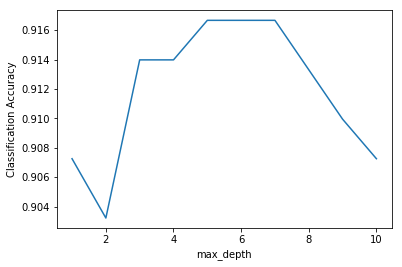

In [9]:
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
depth_search=[1,2,3,4,5,7,9,10]
Accuracy_list=[]
#initialise variable to store values
true_positive = []
true_negative = []
false_positive = []
false_negative = []
accuracy_vals = []
print("Plot maxdepth vs accuracy to choose best classsification property to avoid overfitting")
for maxdepth in depth_search:
#     print(depth_search.keys())
    DT=tree.DecisionTreeClassifier(max_depth=maxdepth)
    DT.fit(x_train,y_train)
    y_dt_pred=DT.predict(x_test)

    treeObj=DT.tree_
#     print("Tree Size is:",treeObj.node_count)
    dt_accuracy = accuracy_score(y_test.values.flatten(),y_dt_pred.flatten())
    accuracy_vals.append(dt_accuracy)
    dt_confusion = confusion_matrix(y_test.values.flatten(),y_dt_pred.flatten())
    true_positive.append(dt_confusion[1][1])
    true_negative.append(dt_confusion[0][0])
    false_positive.append(dt_confusion[0][1])
    false_negative.append(dt_confusion[1][0])
    Accuracy_list.append(dt_accuracy)
#     print("max_depth:",maxdepth,"Accuracy:",dt_accuracy)
plt.figure()
plt.plot(depth_search,Accuracy_list)
plt.xlabel("max_depth")
plt.ylabel("Classification Accuracy")    
plt.show()    

## Observation 1: 
From the above plot(max_depth vs classification accuracy), it can be infered that model starts getting overfit on train data if tree depth is more than 4 or 5(This changes because plot changes on each run due to random nature)

## Code to search for best value of min_samples_split in Decision Tree

Plot maxdepth vs accuracy to choose best classsification property to avoid overfitting


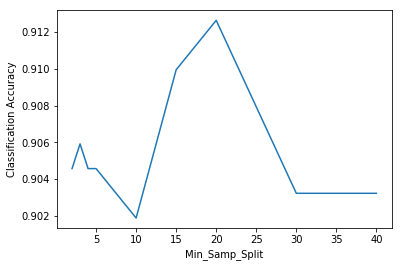

In [10]:
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
depth_search=[1,2,3,4,5,7,9,10]
min_samples_split_search=[2,3,4,5,10,15,20,30,35,40]
Accuracy_list=[]
#initialise variable to store values
true_positive = []
true_negative = []
false_positive = []
false_negative = []
accuracy_vals = []
print("Plot maxdepth vs accuracy to choose best classsification property to avoid overfitting")
for minsamp in min_samples_split_search:
#     print(depth_search.keys())
    DT=tree.DecisionTreeClassifier(min_samples_split=minsamp)
    DT.fit(x_train,y_train)
    y_dt_pred=DT.predict(x_test)

    treeObj=DT.tree_
#     print("Tree Size is:",treeObj.node_count)
    dt_accuracy = accuracy_score(y_test.values.flatten(),y_dt_pred.flatten())
    accuracy_vals.append(dt_accuracy)
    dt_confusion = confusion_matrix(y_test.values.flatten(),y_dt_pred.flatten())
    true_positive.append(dt_confusion[1][1])
    true_negative.append(dt_confusion[0][0])
    false_positive.append(dt_confusion[0][1])
    false_negative.append(dt_confusion[1][0])
    Accuracy_list.append(dt_accuracy)
#     print("max_depth:",maxdepth,"Accuracy:",dt_accuracy)
plt.figure()
plt.plot(min_samples_split_search,Accuracy_list)
plt.xlabel("Min_Samp_Split")
plt.ylabel("Classification Accuracy")    
plt.show()  

## Observation 2: 
From the above plot(Min_Samp_Split vs classification accuracy), it can be infered that model gives best performance on dev/train set if min_samp_split is in range 20-23

# Decision Tree classifier implementation with best tuned parameters

In [12]:
# Decision Tree classifier with best tuned parameters
DT=tree.DecisionTreeClassifier(max_depth=4,min_samples_split=22)
DT.fit(x_train,y_train)
y_dt_pred=DT.predict(x_test)
treeObj=DT.tree_
# print("Tree Size is:",treeObj.node_count)
dt_accuracy = accuracy_score(y_test.values.flatten(),y_dt_pred.flatten())
accuracy_vals.append(dt_accuracy)
dt_confusion = confusion_matrix(y_test.values.flatten(),y_dt_pred.flatten())
true_positive.append(dt_confusion[1][1])
true_negative.append(dt_confusion[0][0])
false_positive.append(dt_confusion[0][1])
false_negative.append(dt_confusion[1][0])
Accuracy_list.append(dt_accuracy)
# print("max_depth:",maxdepth,"Accuracy:",dt_accuracy)        

print("Accuracy Score(DT,max_depth=4) :\n",dt_accuracy)
print("Confusion Matrix(DT,max_depth=4) :\n",dt_confusion)
print("\nClassification Report(DT,max_depth=4) :\n",classification_report(y_test,y_dt_pred))

Accuracy Score(DT,max_depth=4) :
 0.9086021505376344
Confusion Matrix(DT,max_depth=4) :
 [[649  26]
 [ 42  27]]

Classification Report(DT,max_depth=4) :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       675
           1       0.51      0.39      0.44        69

   micro avg       0.91      0.91      0.91       744
   macro avg       0.72      0.68      0.70       744
weighted avg       0.90      0.91      0.90       744



## Justification for Classification Parameter Selection for Decision Tree

### max_depth = 4 
The maximum depth of the tree.
### min_split_size = 22
The minimum number of samples required to split an internal node
### Reasoning:
As it is well known fact that Decision Trees are prone to problem of overfitting, hence selection of right classification parameters(aka hyperparameters) is very important.
As discussed in previous two steps(observation 1 and observation 2), we observed that DT classification accuracy on given data set improves from ~89.6 %(max_depth=default based on dataset i.e. definitely greater than 4, min_split_size=2) to ~91.55 % (max_depth=4 and min_split_size=35). Also it is worth to note that with smaller "max_depth" and larger "min_split_size" improves the computational efficiency of the DT model.

## Code to search for best value of ensemble size in Random Forest

C:\Users\jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\jatin\Anaconda3\lib\site-packages\ipykernel_lau

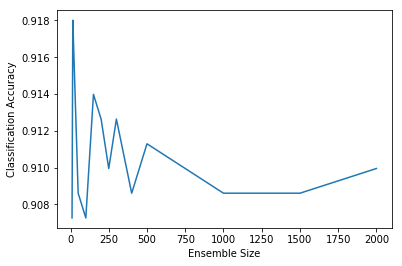

[0.907258064516129, 0.918010752688172, 0.9166666666666666, 0.9086021505376344, 0.907258064516129, 0.9139784946236559, 0.9126344086021505, 0.9099462365591398, 0.9126344086021505, 0.9086021505376344, 0.9112903225806451, 0.9099462365591398, 0.9086021505376344, 0.9086021505376344, 0.9099462365591398]


In [94]:
##Code to search for best value of ensemble size
from sklearn.ensemble import RandomForestClassifier
ensemblesize_search=[10,15,20,50,100,150,200,250,300,400,500,750,1000,1500,2000]
Accuracy_list=[]
for ens_size in ensemblesize_search:
    RF=RandomForestClassifier(n_estimators = ens_size, )
    RF.fit(x_train,y_train)
    y_rf_pred=RF.predict(x_test)
    rf_accuracy = accuracy_score(y_test.values.flatten(),y_rf_pred.flatten())
#     accuracy_vals.append(rf_accuracy)
#     rf_confusion = confusion_matrix(y_test.values.flatten(),y_rf_pred.flatten())
#     true_positive.append(rf_confusion[1][1])
#     true_negative.append(rf_confusion[0][0])
#     false_positive.append(rf_confusion[0][1])
#     false_negative.append(rf_confusion[1][0])
    Accuracy_list.append(rf_accuracy)
#     print("max_depth:",maxdepth,"Accuracy:",dt_accuracy)
plt.figure()
plt.plot(ensemblesize_search,Accuracy_list)
plt.xlabel("Ensemble Size")
plt.ylabel("Classification Accuracy")    
plt.show()    
print(Accuracy_list)
# print("Accuracy Score :\n", rf_accuracy)
# print("Confusion Matrix :\n",rf_confusion)
# print(classification_report(y_test,y_rf_pred))

## Justification for Classification Parameter Selection for Random Forest: 

### Ensemble Size 500
### Max Features 8
### Reasoning
From the above plot, it is very difficult to say that which is the best emsemble size for best classification accuracy. However it can be observed that classification accuracy becomes more or less in constant after ensemble size = 500.Therefore we chose n_estimator =500. 
For "max_feature" parameter we are chosing 8 i.e. approx. squrt(No. of Features in Dataset). This value is considered to be empirically best for any Random Forest algotithm for classification problem.

In [13]:
## RF with best Ensemble Size
ens_size=500
max_features=8
# print(max_features)
RF=RandomForestClassifier(n_estimators = ens_size,max_features=math.ceil(math.sqrt(x_train.shape[1])))
RF.fit(x_train,y_train)
y_rf_pred=RF.predict(x_test)
rf_accuracy = accuracy_score(y_test.values.flatten(),y_rf_pred.flatten())
accuracy_vals.append(rf_accuracy)
rf_confusion = confusion_matrix(y_test.values.flatten(),y_rf_pred.flatten())
true_positive.append(rf_confusion[1][1])
true_negative.append(rf_confusion[0][0])
false_positive.append(rf_confusion[0][1])
false_negative.append(rf_confusion[1][0])
Accuracy_list.append(rf_accuracy)

print("Accuracy Score(Ensemble Size 750, max_features=8) :\n", rf_accuracy)
print("Confusion Matrix(Ensemble Size 750, max_featues=8) :\n",rf_confusion)
print(classification_report(y_test,y_rf_pred))

C:\Users\jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy Score(Ensemble Size 750, max_features=8) :
 0.907258064516129
Confusion Matrix(Ensemble Size 750, max_featues=8) :
 [[665  10]
 [ 59  10]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       675
           1       0.50      0.14      0.22        69

   micro avg       0.91      0.91      0.91       744
   macro avg       0.71      0.57      0.59       744
weighted avg       0.88      0.91      0.88       744



## Code to search for best hidden layer size in Neural Network Implementation

C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

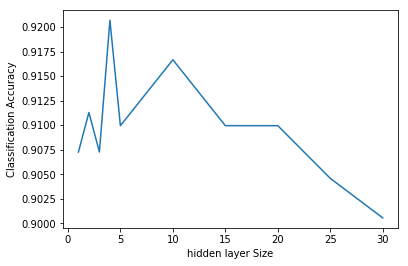

[0.907258064516129, 0.9112903225806451, 0.907258064516129, 0.9206989247311828, 0.9099462365591398, 0.9166666666666666, 0.9099462365591398, 0.9099462365591398, 0.9045698924731183, 0.9005376344086021]


In [98]:
## Code to search for best hidden layer size
from sklearn.neural_network import MLPClassifier
hiddensize_search=[1,2,3,4,5,10,15,20,25,30]
Accuracy_list=[]
for h in hiddensize_search:
    
    NN=MLPClassifier(solver='adam', hidden_layer_sizes = (h))
    NN.fit(x_train,y_train)
    y_nn_pred=NN.predict(x_test)
    nn_accuracy = accuracy_score(y_test.values.flatten(),y_nn_pred.flatten())
    accuracy_vals.append(nn_accuracy)
    nn_confusion = confusion_matrix(y_test.values.flatten(),y_nn_pred.flatten())
    true_positive.append(nn_confusion[1][1])
    true_negative.append(nn_confusion[0][0])
    false_positive.append(nn_confusion[0][1])
    false_negative.append(nn_confusion[1][0])
    Accuracy_list.append(nn_accuracy)
plt.figure()
plt.plot(hiddensize_search,Accuracy_list)
plt.xlabel("hidden layer Size")
plt.ylabel("Classification Accuracy")    
plt.show() 
print(Accuracy_list)
# print("Accuracy Score :\n",nn_accuracy)
# print("Confusion Matrix :\n",nn_confusion)
# print(classification_report(y_test,y_nn_pred))

## Justification for Classification Parameter Selection for Random Forest
### hidden layer size= 20
### No. of hidden layers=1
### Reasoning:
As it can be observed that performance of neural network model improves initially with the increase of hidden layer size but decreases after hidden layer size is greater than 20. Possible reason for this is that NN model starts overfitting on training data. Therfore we have chosed hidden_layer_size parameter as 20.
Also we observered that NN accuracy decreases with more number of hidden layers, therefore we decided to keep hidden_layers=1

In [99]:
NN_Accuracy=[]
for count in range(20):
    
    NN=MLPClassifier(solver='adam', hidden_layer_sizes = (20))
    NN.fit(x_train,y_train)
    y_nn_pred=NN.predict(x_test)
    nn_accuracy = accuracy_score(y_test.values.flatten(),y_nn_pred.flatten())
#     accuracy_vals.append(nn_accuracy)
    nn_confusion = confusion_matrix(y_test.values.flatten(),y_nn_pred.flatten())
    true_positive.append(nn_confusion[1][1])
    true_negative.append(nn_confusion[0][0])
    false_positive.append(nn_confusion[0][1])
    false_negative.append(nn_confusion[1][0])
    NN_Accuracy.append(nn_accuracy)
averageaccuracy=sum(NN_Accuracy)/len(NN_Accuracy)
print("Accuracy Score(Hidden_Size 20) :\n",averageaccuracy)
print("Confusion Matrix(Hidden_Size 20) :\n",nn_confusion)
print(classification_report(y_test,y_nn_pred))

C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Accuracy Score(Hidden_Size 20) :
 0.9055107526881722
Confusion Matrix(Hidden_Size 20) :
 [[650  25]
 [ 45  24]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       675
           1       0.49      0.35      0.41        69

   micro avg       0.91      0.91      0.91       744
   macro avg       0.71      0.66      0.68       744
weighted avg       0.89      0.91      0.90       744



C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Task 4. Plots

In [ ]:
import seaborn as sns
pred_data = x_test.iloc[:,:20]
pred_data["subscribed"] = y_dt_pred
sns.pairplot(pred_data, hue="subscribed", size = 2)

C:\Users\jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jatin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weig

**Observations:**
1. We plotted the pairplots for first 20 features above and it can be seen that for few pair of features, the classification is better. 
2. The classification is better for few features because these features are important and help in deciding the class. Few pair of features are overlapping and hence do not help the classifier alone, however, these features with some additional features might give a good classification. 
3. Therefore, the separation of classes in the above plots is an indicator of which features are useful for the classifier to learn and which features are not useful.

It was observed that below features are important in deciding the whether client will subscribe or not- 
1. **Campaign** - As the campaign value increases, i.e., the number of calls to the client are more, he/she does not subscribe irrespective of the job and age 
2. **Age and Duration** - It can be seen that as the duration of call increases, the client is unlinkely to subscribe irrespective of the age.
3. **Age and Job** - If the job of the client is Entrepreneur or Housemaid, irrespective of age, they are not likely to subscribe. 

### Task 5. Performance Comparison 
 We already computed the accuracy scores, confusion matrix and classification report above for the 3 algorithms - Decision Trees, Random Forest and Neural Networks. Below are the visualisation of the results -

In [181]:
table = pd.DataFrame({'True positive':true_positive,'True negative':true_negative, 'False Positive':false_positive, 'False Negative': false_negative,'Accuracy':accuracy_vals})
table.rename(index={0:'Decision Trees',1:'Random Forest',2:'Neural Network'})

,True positive,True negative,False Positive,False Negative,Accuracy
Decision Trees,27,644,31,42,0.901882
Random Forest,9,667,8,60,0.908602
Neural Network,21,642,33,48,0.891129


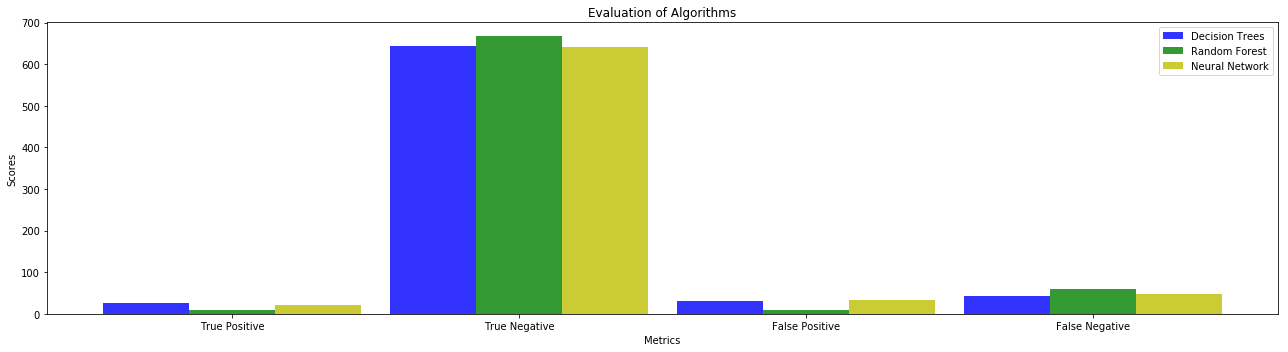

In [182]:
# data to plot
n_groups = 4
means_dt = (true_positive[0], true_negative[0], false_positive[0], false_negative[0])
means_rf = (true_positive[1], true_negative[1], false_positive[1], false_negative[1])
means_nn = (true_positive[2], true_negative[2], false_positive[2], false_negative[2])
# create plot
fig, ax = plt.subplots(figsize=(18,5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, means_dt, bar_width,
alpha=opacity,
color='b',
label='Decision Trees')
 
rects2 = plt.bar(index + bar_width, means_rf, bar_width,
alpha=opacity,
color='g',
label='Random Forest')

rects3 = plt.bar(index + 2*bar_width, means_nn, bar_width,
alpha=opacity,
color='y',
label='Neural Network')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation of Algorithms')
plt.xticks(index + bar_width, ('True Positive', 'True Negative', 'False Positive', 'False Negative'))
plt.legend()
 
plt.tight_layout()
plt.show()

[90.18817204301075, 90.86021505376344, 89.11290322580645]


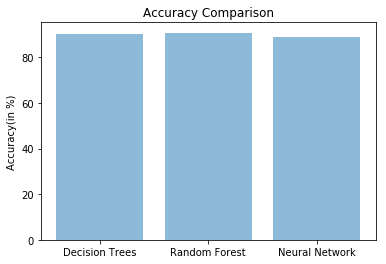

In [183]:
algorithms = ('Decision Trees', 'Random Forest', 'Neural Network')
y_pos = np.arange(len(algorithms))
for i in range(0,len(accuracy_vals)):
    accuracy_vals[i] = accuracy_vals[i]*100
print(accuracy_vals)
plt.bar(y_pos, accuracy_vals, align='center', alpha=0.5)
plt.xticks(y_pos, algorithms)
plt.ylabel('Accuracy(in %)')
plt.title('Accuracy Comparison')
 
plt.show()

### Task 6. Observations :
1. In the above plots, the first bar chart indicates the true/false positive/negative values predicted by the three classifiers(Decision Trees, Random Forest and Neural Networks) and the second bar plot depicts the average accuracy scores of the three classifiers on the test set.
2. Overall, from the above plots it can be seen that **Random Forest** algorithm performs best among the three algorithms and has comparable values of false negative and false positive with the neural network. The accuracy score is also highest for Random Forest.

**Why Random Forest has better performance?**
1. Random Forest algorithm works better as it uses a technique called bagging(stands for "Bootstrap Aggregating"). In this approach, different trees are learned by chosing random subsets of data and random features unlike decision trees where the most important feature is used for splitting a node. The learning is combined/averaged across different subsets of trees. This wide diversity and randomness results in a better model and reduces the variance.

2. This algorithm is not sensitive to the kind of data and works well without much preprocessing. Hence, its performance on imbalanced dataset (Dataset A) is not much affected.

### Contrast performance with classification from the previous homework
We will compare the above algorithms results with SVM(linear kernel) and K Nearest Neighbours, below is the comparison-


In [184]:
print(true_positive)
true_positive.append(276)
true_positive.append(285)
true_positive.append(248)
true_positive.append(368)

true_negative.append(7152)
true_negative.append(7159)
true_negative.append(7209)
true_negative.append(7114)

false_positive.append(148)
false_positive.append(141)
false_positive.append(139)
false_positive.append(234)

false_negative.append(662)
false_negative.append(653)
false_negative.append(642)
false_negative.append(522)

accuracy_vals.append(90.17)
accuracy_vals.append(90.3)
accuracy_vals.append(90.52)
accuracy_vals.append(90.82)

table2 = pd.DataFrame({'True positive':true_positive,'True negative':true_negative, 'False Positive':false_positive, 'False Negative': false_negative,'Accuracy':accuracy_vals})
table2.rename(index={0:'Decision Trees',1:'Random Forest',2:'Neural Network',3:'SVM',4:'KNN',5:'SVM(applying get_dummies)',6:'KNN(applying get_dummies)'})

[27, 9, 21]


,True positive,True negative,False Positive,False Negative,Accuracy
Decision Trees,27,644,31,42,90.188172
Random Forest,9,667,8,60,90.860215
Neural Network,21,642,33,48,89.112903
SVM,276,7152,148,662,90.170000
KNN,285,7159,141,653,90.300000
SVM(applying get_dummies),248,7209,139,642,90.520000
KNN(applying get_dummies),368,7114,234,522,90.820000


### Task 7 Data Imbalance Problem - 
<p> We observe that the data distribution of this data set is imbalanced as the 'no' labels are much higher compared to 'yes' labels (~ ratio of 7:1). This imbalance data can mislead our classifiers to predict the larger class more.</p>
<p> This can also be observed from the classfication reports given for all the methods above that the <b>precision, recall and f-score</b> of the class 1('yes') has much lower score which shows that classifiers are not able to predict 'yes' class correctly.</p>

In [185]:
#check data imbalance
count_class_0, count_class_1 = bank_data_cast['y'].value_counts()
print(count_class_0, count_class_1)

3668 451


# Question 2 - Data set B
This data is the splice junctions on DNA sequences. This dataset has 57 numeric features.

## 1. Data loading and Preprocessing

In [15]:
#loading and reading the data
data_dna=pd.read_csv("data/DataDNA.csv")
#print(data_dna.head(20))
data_dna.head()

,1,2,1.1,2.1,1.2,2.2,3,3.1,3.2,3.3,...,3.8,2.19,3.9,4.6,2.20,2.21,2.22,2.23,1.15,1.16
0,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
1,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
2,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
3,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1
4,3,2,3,1,2,3,4,3,1,4,...,2,2,2,3,4,2,2,2,2,-1


### Feature visualisation , understanding using histograms
This step is performed to get better understanding of features because no data description is given.

C:\Windows\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


 1    1136
-1    1063
Name: 1.16, dtype: int64

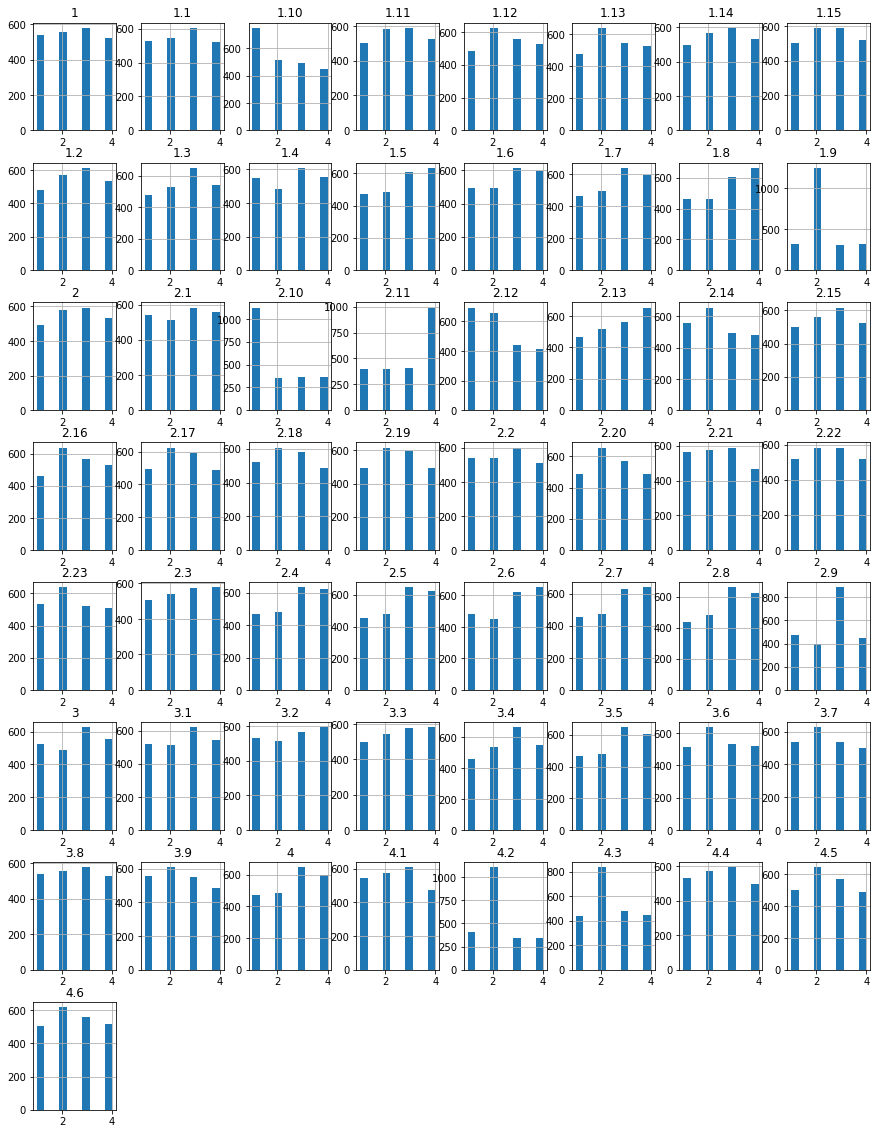

In [4]:
#plotting data to know the data better
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_dna.iloc[:,:-1].hist(ax = ax)
data_dna['1.16'].value_counts()

## Task 2.1

### Normalize data using z-score normalization
<b>Normalization</b> -In general normalization or feature scaling is done because of following reasons:
1. To compare different features.
2. It prevents the features having larger values to dominate the data and hence the algorithms can give better results with less bias. 
3. Most machine learning algorithms are based on Euclidean distance(e.g KNN) therefore feature scaling is necessary.
4. Algorithms like Decision trees converge faster if normalization in performed.
  
<b>Z-score Normalisation</b> - This type of normalisation is computed by<br>

                                (Feature Value - Mean) / Standard Deviation 
<p>The data points having value equal to the mean are normalised to 0 and also the data points that are far from the mean (outliers), i.e., having high value of standard deviation also become small value ~ 0. Thus, this normalisation prevents outliers from dominating the data and centers the data around mean.</p>


**Why z-score Normalisation is being used here and not min-max normalization?**

1. Z-score is beneficial when data distribution is gaussian. After the data visualization using histogram plotting, we took hypothesis that features follows gaussian distribution.
2. Z-score is chosen to make the analysis less sensitive to outliers, as min-max normalization is sensitive to outliers.

<p>Note: In order to double check our hypothesis we performed that classification task with both Zscore as well as minmax normalization. It is observed that after using minmax normalization instead of zscore normalization accuracy scores got reduced by 1-2%.</p>

### Splitting test and training data randomly - 
<p>The reason we split the the training and testing data randomly is to avoid overfitting. If we fix our training and testing data, then the model will train for a particular set, and will not be able to generalise. Hence, this will result in good performance for a fixed train and test set, but if model is exposed to any new testing data, it might not perform well. Hence, we train the model on a random sample each time so that it generalise.</p>

### Data Distribution - 
From the below results, it can be observed that data set is quite balanced with 51.69% datapoints are labeled as +1 and 48.31% features are labeled -1. 




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E73B2EBE0>,
      dtype=object)

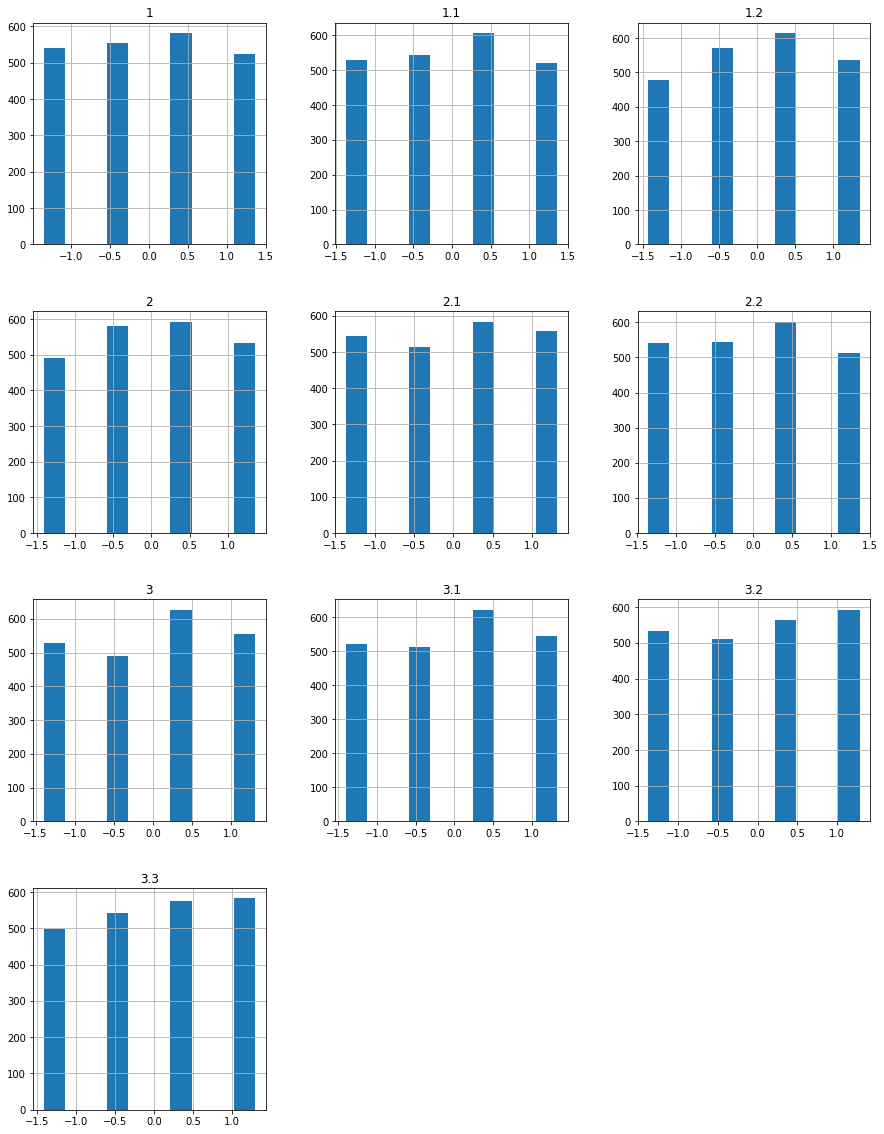

In [5]:
data_dnazscore=pd.DataFrame(stat.zscore(data_dna),columns=data_dna.columns)
data_dnazscore.iloc[:,-1]=data_dna.iloc[:,-1]
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_dnazscore.iloc[:,:10].hist(ax=ax)

In [6]:
## Code to check data distribution
dist = data_dnazscore.iloc[:,:-1]
dist['label'] = data_dnazscore.iloc[:,-1]
print("Count of the 2 types of labels(+1 and -1): ")
dist['label'].value_counts()

Count of the 2 types of labels(+1 and -1): 


 1    1136
-1    1063
Name: label, dtype: int64

In [7]:
#default = 25%
#dropping feature 2.22 - least important feature - not much effect in accuracy
#data_dnazscore = data_dnazscore.drop("2.22", axis=1)
x_train_dna,x_test_dna,y_train_dna,y_test_dna=train_test_split(data_dnazscore.iloc[:,:-1],data_dnazscore.iloc[:,-1], random_state=21)
print(x_train_dna.shape)
print(x_test_dna.shape)

(1649, 57)
(550, 57)


## Task2. Parameter Selection
### Task 2(a): K-Nearest Neighbour Classifier Implementation

[0.7367253822216401, 0.7435570384708035, 0.7499155306493412, 0.7467202802982171, 0.7626325103106749, 0.7480828718593118, 0.7440012579892177, 0.7426231540452173, 0.7417130277250681, 0.7421696533932135, 0.74262833579625, 0.7367212969263084, 0.735356620455872, 0.7312739664789779, 0.7294278755196426, 0.7307925472943371]


Text(0, 0.5, 'Accuracy')

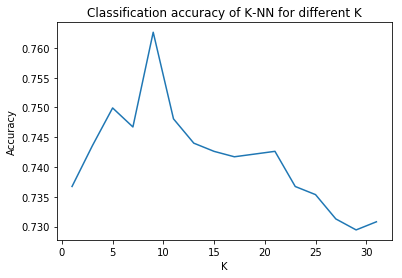

In [8]:
from sklearn.model_selection import cross_val_score
k = 1
k_val = []
final_accuracy = []
for i in range(1,17):
    k_val.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, data_dnazscore.iloc[:,:-1], data_dnazscore.iloc[:,-1], cv=5)
    final_accuracy.append(scores.mean())
    k = k + 2

print(final_accuracy)
plt.plot(k_val,final_accuracy)
plt.title('Classification accuracy of K-NN for different K')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Task 2(a): Results and Reasoning
From the above plot, it can be observed that from different values of K = 1, 3, 5, 7,...31, the accuracy of our algorithm is highest at K = 9 , at which the accuracy is ~ 76%.

<b>Reason for chosing cross-validation instead of directly evaluating on the test set-</b>

To answer in one sentence; this was done **to avoid overfitting problem**. Given below is the detailed explanation of the reason:
<p>When we tune any hyperparameters based on improving performance on a fixed test set, that might work well for that particular set and fail on any other new test data. That leads to overfitting for a particular set of data.
In our case, we wanted to tune value of K hyperparameter for the K- nearest neighbours, therefore, one value of K might give higher accuracy for a fixed test set, while give a low accuracy on another test set. Therefore, by using 5 cross validation, we divide our training set into 5 folds, in which our model trains for 4 folds and tests on 1 fold. This happens in rotation for all folds and test accuracy is computed as average across folds. This gives a better value for our hyperparameters that do not just work well for a single set of test data(overfitting) but for different test data.</p>

### Task 2b.) SVM(RBF Kernel) Implementation and Parameter Searching

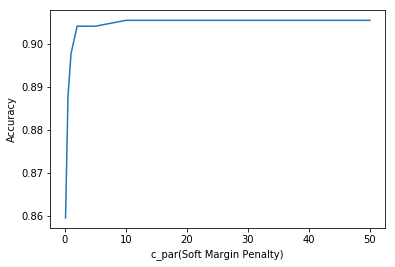

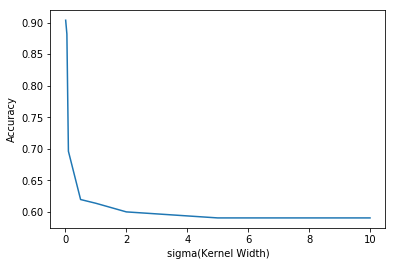

Accuracy_Sigma [0.9036226262438433, 0.8817940480534038, 0.6962366447234654, 0.619826288077183, 0.6139140862391758, 0.6002694252271212, 0.5907198055587252, 0.5907198055587252]
Accuracy_X [0.8595057520488695, 0.8877010822276035, 0.8977062874573452, 0.9040709733192648, 0.9040730394456397, 0.905437711220334, 0.905437711220334, 0.905437711220334]


In [9]:
from sklearn.svm import SVC  
import operator
c_param = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
sigma = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10] 
accuracy_C = []
accuracy_SIGMA = []
#finding the best values for c and sigma in terms of accuracy
for i in c_param:
    svclassifier_C = SVC(kernel='rbf', C=i, gamma='auto')
    scores = cross_val_score(svclassifier_C, data_dnazscore.iloc[:,:-1], data_dnazscore.iloc[:,-1], cv=5)
    accuracy_C.append(scores.mean())
# plt.fig()
plt.plot(c_param,accuracy_C)
plt.xlabel('c_par(Soft Margin Penalty)')
plt.ylabel('Accuracy')
plt.show()
index_c, value_c = max(enumerate(accuracy_C), key=operator.itemgetter(1))
C_best = c_param[index_c]
#using C for which we get the highest accuracy and finding best sigma
for j in sigma:
    svclassifier_SIG = SVC(kernel='rbf', C=C_best, gamma=j)
    scores = cross_val_score(svclassifier_SIG, data_dnazscore.iloc[:,:-1], data_dnazscore.iloc[:,-1], cv=5)
    accuracy_SIGMA.append(scores.mean())
# print(accuracy_SIGMA)
index_s, value_s = max(enumerate(accuracy_SIGMA), key=operator.itemgetter(1))
sigma_best = sigma[index_s]
# plt.fig()
plt.plot(sigma,accuracy_SIGMA)
plt.xlabel('sigma(Kernel Width)')
plt.ylabel('Accuracy')
plt.show()
print("Accuracy_Sigma",accuracy_SIGMA)
print("Accuracy_X",accuracy_C)

### Task 2(b) ROC Curves
For plotting the Receiver Operating Characteristic(ROC) curve, we are using the roc_curve method of the scikit learn library.

[[2.90966545e-01 7.09033455e-01]
 [5.78936585e-01 4.21063415e-01]
 [1.78386767e-06 9.99998216e-01]
 ...
 [9.66443394e-01 3.35566056e-02]
 [2.52263844e-02 9.74773616e-01]
 [3.64342636e-03 9.96356574e-01]]


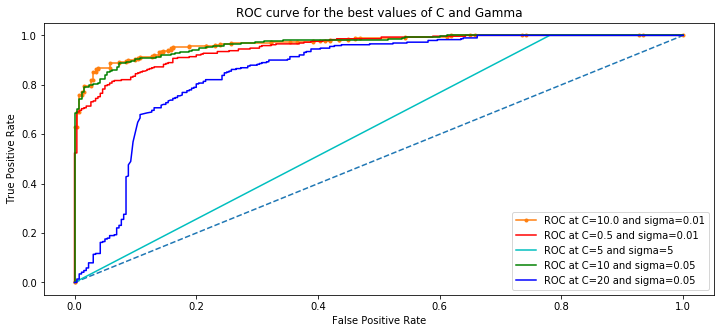

In [20]:
#plotting ROC curves for few combinations of C and sigma values to verify that 
#Using C and sigma giving the best results
from sklearn.metrics import roc_curve
classifier = SVC(kernel='rbf', C=C_best, gamma=sigma_best, probability=True)
classifier.fit(x_train_dna,y_train_dna)
y_probas = classifier.predict_proba(x_test_dna)
f, ax = plt.subplots(figsize=(12,5))
print(y_probas)
fpr, tpr, thresholds = roc_curve(y_test_dna, y_probas[:,1])

classifier2 = SVC(kernel='rbf', C=0.5, gamma=0.01, probability=True)
classifier2.fit(x_train_dna,y_train_dna)
y_probas2 = classifier2.predict_proba(x_test_dna)
fpr1, tpr1, thresholds1 = roc_curve(y_test_dna, y_probas2[:,1])

classifier3 = SVC(kernel='rbf', C=5, gamma=5, probability=True)
classifier3.fit(x_train_dna,y_train_dna)
y_probas3 = classifier3.predict_proba(x_test_dna)
fpr2, tpr2, thresholds2 = roc_curve(y_test_dna, y_probas3[:,1])

classifier4 = SVC(kernel='rbf', C=10, gamma=0.05, probability=True)
classifier4.fit(x_train_dna,y_train_dna)
y_probas4 = classifier4.predict_proba(x_test_dna)
fpr3, tpr3, thresholds3 = roc_curve(y_test_dna, y_probas4[:,1])

classifier5 = SVC(kernel='rbf', C=20, gamma=0.5, probability=True)
classifier5.fit(x_train_dna,y_train_dna)
y_probas5 = classifier5.predict_proba(x_test_dna)
fpr4, tpr4, thresholds4 = roc_curve(y_test_dna, y_probas5[:,1])

# plot no skill
plt.title('ROC curve for the best values of C and Gamma')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC at C=%.1f and sigma=%.2f'%(C_best,sigma_best))
plt.plot(fpr1, tpr1, color='r',label='ROC at C=0.5 and sigma=0.01')
plt.plot(fpr2, tpr2, color='c',label='ROC at C=5 and sigma=5')
plt.plot(fpr3, tpr3, color='g',label='ROC at C=10 and sigma=0.05')
plt.plot(fpr4, tpr4, color='b',label='ROC at C=20 and sigma=0.05')
# show the plot
plt.legend()
plt.show()


### Task 2(b) Results
<p>From the above plots, it can be seen that the false positive rate is minimum at <b>C=10 and sigma=0.01</b>. This verifies our result from cross validation above, where we got maximum cross validation score/accuracy for C=10 and sigma=0.01. </p>

## Task 3. Train six Classifiers and Report Results

### Task 3a. Classify the test set using k-NN, SVM, Random Forests and Neural Networks. 

**Classifier 1- KNN - Using neighbour = 9 as it gives best accuracy with k-fold cross validation (Refer Ques 2)**

In [31]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_dna, y_train_dna)
y_knn_pred=knn.predict(x_test_dna)
print("Accuracy Score for KNN Classifier:",accuracy_score(y_test_dna,y_knn_pred))
print("Classification Report:\n"classification_report(y_test_dna,y_knn_pred))


Accuracy Score and Classification Report for KNN Classifier: 0.7563636363636363
              precision    recall  f1-score   support

          -1       0.67      0.97      0.79       260
           1       0.95      0.57      0.71       290

   micro avg       0.76      0.76      0.76       550
   macro avg       0.81      0.77      0.75       550
weighted avg       0.82      0.76      0.75       550



**Classifier 2. SVM - Using C = 10 and gamma = 0.01  (Refer Ques 2)**


In [47]:
svc = SVC(kernel='rbf', C=10, gamma=0.01)
svc.fit(x_train_dna, y_train_dna)
y_svc_pred = svc.predict(x_test_dna)
print("Accuracy Score for SVM Classifier:",accuracy_score(y_test_dna,y_svc_pred))
print("Classification Report:\n",classification_report(y_test_dna,y_svc_pred))

Accuracy Score for SVM Classifier: 0.9072727272727272
Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.93      0.90       260
           1       0.93      0.89      0.91       290

   micro avg       0.91      0.91      0.91       550
   macro avg       0.91      0.91      0.91       550
weighted avg       0.91      0.91      0.91       550



**Classifier 3. Random Forest with default parameters**

In [49]:
RF_dna=RandomForestClassifier()
RF_dna.fit(x_train_dna,y_train_dna)
y_rfdna_pred=RF_dna.predict(x_test_dna)
print("Accuracy Score for RF Classifier:",accuracy_score(y_test_dna,y_rfdna_pred))
print(classification_report(y_test_dna,y_rfdna_pred))

Accuracy Score for RF Classifier: 0.9418181818181818
              precision    recall  f1-score   support

          -1       0.90      0.98      0.94       260
           1       0.98      0.91      0.94       290

   micro avg       0.94      0.94      0.94       550
   macro avg       0.94      0.94      0.94       550
weighted avg       0.94      0.94      0.94       550



C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Classifier 4. Neural Network with default parameters**

In [53]:
NN_dna=MLPClassifier()
NN_dna.fit(x_train_dna,y_train_dna)
y_nndna_pred=NN_dna.predict(x_test_dna)
print("Accuracy Score for Neural Network:",accuracy_score(y_test_dna,y_nndna_pred))
print(classification_report(y_test_dna,y_nndna_pred))

Accuracy Score for Neural Network: 0.9018181818181819
              precision    recall  f1-score   support

          -1       0.88      0.92      0.90       260
           1       0.93      0.88      0.90       290

   micro avg       0.90      0.90      0.90       550
   macro avg       0.90      0.90      0.90       550
weighted avg       0.90      0.90      0.90       550



### Task 3(a) Results:
From above results, it can be concluded that Random Forests outperform all other models by giving more than 94% accuracy and F1 score. 

### Task 3 b.) Customized Classifiers after hyper parameter search for RF and NN
**Classifier5. Random Forest Parameter Changes.**

Important parameters for this algorithm are : 
- n_estimators - number of decision trees in the forest 
- max_features -  the number of features considered by each tree when splitting a node.
- max_depth - max number of levels in each decision tree
- min_samples_split - min number of data points placed in a node before the node is split
- min_samples_leaf - min number of data points allowed in a leaf node
- bootstrap - method for sampling data points (with or without replacement)

 Here, we are using Scikit-Learn RandomizedSearchCV method. First we define a grid of hyperparameter ranges, and then randomly sample from the grid, performing 3-Fold cross validation with each combination of values.

In [60]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [30,50,60,80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4,6,8],
    'min_samples_split': [2, 5,10,30,40],
    'n_estimators': [100, 200, 300,500]
}

RF_dna=RandomForestClassifier()
print(RF_dna.get_params())

# Instantiate the grid search model
rf_random = RandomizedSearchCV(estimator = RF_dna, param_distributions = param_grid, n_iter = 50, cv = 6, verbose=2, random_state=42, n_jobs = -1)

# Fit the grid search to the data
rf_random.fit(x_train_dna, y_train_dna)
print("Best Features:\n",rf_random.best_params_)

RF_best_model = rf_random.best_estimator_
#RF_best_model.fit(x_train_dna,y_train_dna)
y_rfdna_pred=RF_best_model.predict(x_test_dna)
print("Classifier 5(RF) Accuracy:",accuracy_score(y_test_dna,y_rfdna_pred))
print(classification_report(y_test_dna,y_rfdna_pred))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 6 folds for each of 50 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


Best Features:
 {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}
Classifier 5 Accuracy: 0.9636363636363636
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       260
           1       0.99      0.94      0.96       290

   micro avg       0.96      0.96      0.96       550
   macro avg       0.96      0.97      0.96       550
weighted avg       0.97      0.96      0.96       550



### Classifier 5 Results:
Note that as we are doing randomized search, results may change after every run of the code. Given  below is one of the instance of best results we achieved:

Best Features:
 {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}
 
Classifier 5 Accuracy: 0.9636363636363636
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       260
           1       0.99      0.94      0.96       290

   micro avg       0.96      0.96      0.96       550
   macro avg       0.96      0.97      0.96       550
weighted avg       0.97      0.96      0.96       550


**Classifier6. Neural Network along with Parameter Search.**

In [65]:
param_grid_nn = {
    'hidden_layer_sizes' : [(10,10),(30,30),(50,50),(10,10,10),(20,20,20),(30,30,30),(50,50,50),(60,60,60),(100,100,100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'batch_size': [50,100,200, 300, 400],
    'learning_rate_init': [0.001,0.01,0.1,0.5,1]
}
NN_dna=MLPClassifier()
print(NN_dna.get_params())
NN_random = RandomizedSearchCV(estimator = NN_dna, param_distributions = param_grid_nn, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
NN_random.fit(x_train_dna, y_train_dna)

print(NN_random.best_params_)
NN_best_model = NN_random.best_estimator_
y_nn_pred=NN_best_model.predict(x_test_dna)
print(classification_report(y_test_dna,y_nn_pred))
print("Classifier 6(NN) Accuracy:",accuracy_score(y_test_dna,y_nn_pred))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   49.6s finished


{'solver': 'adam', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (50, 50), 'batch_size': 300, 'activation': 'relu'}
              precision    recall  f1-score   support

          -1       0.88      0.94      0.91       260
           1       0.94      0.89      0.91       290

   micro avg       0.91      0.91      0.91       550
   macro avg       0.91      0.91      0.91       550
weighted avg       0.91      0.91      0.91       550

Classifier 6(NN) Accuracy: 0.9127272727272727


**Classifier 6 Results**
Note that as we are doing randomized search, results may change after every run of the code. Given below is one of the instance of best results we achieved:

{'solver': 'adam', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (50, 50), 'batch_size': 300, 'activation': 'relu'}

              precision    recall  f1-score   support

          -1       0.88      0.94      0.91       260
           1       0.94      0.89      0.91       290

   micro avg       0.91      0.91      0.91       550
   macro avg       0.91      0.91      0.91       550
weighted avg       0.91      0.91      0.91       550

Classifier 6(NN) Accuracy: 0.9127272727272727

### Task 3c.) Classification using k-fold cross validation 

In [69]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
import time

k_fold = [4,5,6,7]
X = data_dnazscore.iloc[:,:-1]
y = data_dnazscore.iloc[:,-1]
classification_reports_knn = []
classification_reports_svm = []
classification_reports_rf = []
classification_reports_nn = []
classification_reports_rf2 = []
classification_reports_nn2 = []
acc_knn = []
acc_svm = []
acc_rf = []
acc_nn = []
acc_rf2 = []
acc_nn2 = []

for k in k_fold:
    rkf = RepeatedKFold(n_splits=k, n_repeats=20, random_state=2652124)
    for train_index, test_index in rkf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Classification Method 1
        start_train_knn = time.time()
        knn.fit(X_train,y_train)
        end_train_knn = time.time()
        train_knn = end_train_knn - start_train_knn
        
        start_classify_knn = time.time()
        y_knn_pred = knn.predict(X_test)
        end_classify_knn = time.time()
        classify_knn = end_classify_knn - start_classify_knn
        
        classification_reports_knn.append(classification_report(y_test,y_knn_pred,output_dict=True)) 
        acc_knn.append(accuracy_score(y_test,y_knn_pred))
        
        
        #Classification Method 2
        start_train_svm = time.time()
        svc.fit(X_train,y_train)
        end_train_svm = time.time()
        train_svm = end_train_svm - start_train_svm
        
        start_classify_svm = time.time()
        y_svm_pred = svc.predict(X_test)
        end_classify_svm = time.time()
        classify_svm = end_classify_svm - start_classify_svm
        
        classification_reports_svm.append(classification_report(y_test,y_svm_pred,output_dict=True))
        acc_svm.append(accuracy_score(y_test,y_svm_pred))
        
        #Classification Method 3
        start_train_rf = time.time()
        RF_dna.fit(X_train,y_train)
        end_train_rf = time.time()
        train_rf = end_train_rf - start_train_rf
        
        start_classify_rf = time.time()
        y_rf_pred=RF_dna.predict(X_test)
        end_classify_rf = time.time()
        classify_rf = end_classify_rf - start_classify_rf
        
        classification_reports_rf.append(classification_report(y_test,y_rf_pred,output_dict=True))
        acc_rf.append(accuracy_score(y_test,y_rf_pred))
       
        #Classification Method 4
        start_train_nn = time.time()
        NN_dna.fit(X_train,y_train)
        end_train_nn = time.time()
        train_nn = end_train_nn - start_train_nn
        
        start_classify_nn = time.time()
        y_nn_pred=NN_dna.predict(X_test)
        end_classify_nn = time.time()
        classify_nn = end_classify_nn - start_classify_nn
        
        classification_reports_nn.append(classification_report(y_test,y_nn_pred,output_dict=True))
        acc_nn.append(accuracy_score(y_test,y_nn_pred))
        
        #Classification Method 5
        RF_best_model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth = 80, bootstrap = True)
        start_train_rf2 = time.time()
        RF_best_model.fit(X_train,y_train)
        end_train_rf2 = time.time()
        train_rf2 = end_train_rf2 - start_train_rf2
        
        start_classify_rf2 = time.time()
        y_rf2_pred=RF_best_model.predict(X_test)
        end_classify_rf2 = time.time()
        classify_rf2 = end_classify_rf2 - start_classify_rf2
        
        classification_reports_rf2.append(classification_report(y_test,y_rf2_pred,output_dict=True))
        acc_rf2.append(accuracy_score(y_test,y_rf2_pred))
        
         #Classification Method 6
        NN_best_model = MLPClassifier(solver= 'sgd', learning_rate_init= 0.1, hidden_layer_sizes= (100, 50, 10), batch_size= 300, activation= 'relu')
        start_train_nn2 = time.time()
        NN_best_model.fit(X_train,y_train)
        end_train_nn2 = time.time()
        train_nn2 = end_train_nn2 - start_train_nn2
        
        start_classify_nn2 = time.time()
        y_nn2_pred=NN_best_model.predict(X_test)
        end_classify_nn2 = time.time()
        classify_nn2 = end_classify_nn2 - start_classify_nn2
        
        classification_reports_nn2.append(classification_report(y_test,y_nn2_pred,output_dict=True))
        acc_nn2.append(accuracy_score(y_test,y_nn2_pred))


C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [70]:
print(classification_reports_knn[0])

{'-1': {'precision': 0.6725, 'recall': 0.9746376811594203, 'f1-score': 0.7958579881656805, 'support': 276}, '1': {'precision': 0.9533333333333334, 'recall': 0.5218978102189781, 'f1-score': 0.6745283018867925, 'support': 274}, 'micro avg': {'precision': 0.7490909090909091, 'recall': 0.7490909090909091, 'f1-score': 0.7490909090909091, 'support': 550}, 'macro avg': {'precision': 0.8129166666666667, 'recall': 0.7482677456891992, 'f1-score': 0.7351931450262366, 'support': 550}, 'weighted avg': {'precision': 0.8124060606060607, 'recall': 0.7490909090909091, 'f1-score': 0.7354137444558344, 'support': 550}}


In [71]:
# getting average values
import statistics
precision = []
recall = []
f1_score = []
accuracy = []
std_precision = []
std_recall = []
std_f1 = []
std_acc = []

precision_knn = [d['weighted avg']['precision'] for d in classification_reports_knn]
recall_knn = [d['weighted avg']['recall'] for d in classification_reports_knn]
f1_knn = [d['weighted avg']['f1-score'] for d in classification_reports_knn]

#calculating averages and standard deviation
precision.append(statistics.mean(precision_knn))
std_precision.append(statistics.stdev(precision_knn))
recall.append(statistics.mean(precision_knn))
std_recall.append(statistics.stdev(recall_knn))
f1_score.append(statistics.mean(precision_knn))
std_f1.append(statistics.stdev(f1_knn))
accuracy.append(statistics.mean(precision_knn))
std_acc.append(statistics.stdev(acc_knn))


precicion_svm = [d['weighted avg']['precision'] for d in classification_reports_svm]
recall_svm = [d['weighted avg']['recall'] for d in classification_reports_svm]
f1_svm = [d['weighted avg']['f1-score'] for d in classification_reports_svm]

precision.append(statistics.mean(precicion_svm))
std_precision.append(statistics.stdev(precicion_svm))
recall.append(statistics.mean(recall_svm))
std_recall.append(statistics.stdev(recall_svm))
f1_score.append(statistics.mean(f1_svm))
std_f1.append(statistics.stdev(f1_svm))
accuracy.append(statistics.mean(acc_svm))
std_acc.append(statistics.stdev(acc_svm))

precicion_rf = [d['weighted avg']['precision'] for d in classification_reports_rf]
recall_rf = [d['weighted avg']['recall'] for d in classification_reports_rf]
f1_rf = [d['weighted avg']['f1-score'] for d in classification_reports_rf]

precision.append(statistics.mean(precicion_rf))
std_precision.append(statistics.stdev(precicion_rf))
recall.append(statistics.mean(recall_rf))
std_recall.append(statistics.stdev(recall_rf))
f1_score.append(statistics.mean(f1_rf))
std_f1.append(statistics.stdev(f1_rf))
accuracy.append(statistics.mean(acc_rf))
std_acc.append(statistics.stdev(acc_rf))

precicion_nn = [d['weighted avg']['precision'] for d in classification_reports_nn]
recall_nn = [d['weighted avg']['recall'] for d in classification_reports_nn]
f1_nn = [d['weighted avg']['f1-score'] for d in classification_reports_nn]
precision.append(statistics.mean(precicion_nn))
std_precision.append(statistics.stdev(precicion_nn))
recall.append(statistics.mean(recall_nn))
std_recall.append(statistics.stdev(recall_nn))
f1_score.append(statistics.mean(f1_nn))
std_f1.append(statistics.stdev(f1_nn))
accuracy.append(statistics.mean(acc_nn))
std_acc.append(statistics.stdev(acc_nn))


precicion_rf2 = [d['weighted avg']['precision'] for d in classification_reports_rf2]
recall_rf2 = [d['weighted avg']['recall'] for d in classification_reports_rf2]
f1_rf2 = [d['weighted avg']['f1-score'] for d in classification_reports_rf2]
precision.append(statistics.mean(precicion_rf2))
std_precision.append(statistics.stdev(precicion_rf2))
recall.append(statistics.mean(recall_rf2))
std_recall.append(statistics.stdev(recall_rf2))
f1_score.append(statistics.mean(f1_rf2))
std_f1.append(statistics.stdev(f1_rf2))
accuracy.append(statistics.mean(acc_rf2))
std_acc.append(statistics.stdev(acc_rf2))

precicion_nn2 = [d['weighted avg']['precision'] for d in classification_reports_nn2]
recall_nn2 = [d['weighted avg']['recall'] for d in classification_reports_nn2]
f1_nn2 = [d['weighted avg']['f1-score'] for d in classification_reports_nn2]
precision.append(statistics.mean(precicion_nn2))
std_precision.append(statistics.stdev(precicion_nn2))
recall.append(statistics.mean(recall_nn2))
std_recall.append(statistics.stdev(recall_nn2))
f1_score.append(statistics.mean(f1_nn2))
std_f1.append(statistics.stdev(f1_nn2))
accuracy.append(statistics.mean(acc_nn2))
std_acc.append(statistics.stdev(acc_nn2))

# print(precision)
# print(recall)
# print(f1_score)
# print(accuracy)
# training_time = [train_knn,train_svm,train_rf,train_nn,train_rf2,train_nn2]
# classification_time = [classify_knn,classify_svm,classify_rf,classify_nn,classify_rf2,classify_nn2]
# print("STD abbreviation used for Standard Deviation")
# table_dna = pd.DataFrame({'Precision':precision, 'STD Precision':std_precision, 'Recall':recall,'STD-Recall':std_recall, 'F1-Score': f1_score,'SDev-F1':std_f1 ,'Accuracy':accuracy,'SDec-Accuracy':std_acc, 'Training Time(s)':training_time, 'Classification Time(s)':classification_time})
# table_dna.rename(index={0:'K-Nearest Neighbour',1:'SVM',2:'Random Forest - Default Params',3:'Neural Network - Deault Params',4:'Random Forest',5:'Neural Network'})

[0.8160567809212013, 0.9079322068835365, 0.9371760864184594, 0.9097631858503904, 0.9691515568920573, 0.9034319326716734]
[0.8160567809212013, 0.9066844767061126, 0.9346062717708641, 0.9084391016831039, 0.9686192475601487, 0.9024231401311171]
[0.8160567809212013, 0.9067121265669993, 0.9346184452958279, 0.9084694050064263, 0.9686333258957938, 0.9024581509529433]
[0.8160567809212013, 0.9066844767061126, 0.9346062717708641, 0.9084391016831039, 0.9686192475601487, 0.9024231401311171]
STD abbreviation used for Standard Deviation


,Precision,STD Precision,Recall,STD-Recall,F1-Score,SDev-F1,Accuracy,SDec-Accuracy,Training Time(s),Classification Time(s)
K-Nearest Neighbour,0.816057,0.015895,0.816057,0.023981,0.816057,0.025940,0.816057,0.023981,0.009996,0.086951
SVM,0.907932,0.013934,0.906684,0.014068,0.906712,0.014080,0.906684,0.014068,0.230642,0.021984
Random Forest - Default Params,0.937176,0.013090,0.934606,0.014100,0.934618,0.014069,0.934606,0.014100,0.035999,0.001998
Neural Network - Deault Params,0.909763,0.013386,0.908439,0.013612,0.908469,0.013607,0.908439,0.013612,2.031137,0.002001
Random Forest,0.969152,0.008490,0.968619,0.008771,0.968633,0.008758,0.968619,0.008771,0.515666,0.031248
Neural Network,0.903432,0.014956,0.902423,0.015054,0.902458,0.015043,0.902423,0.015054,0.841421,0.001997


### Task 3c Results:

In [79]:
print("Reporting of results for Six Classifiers:\n 1. KNN     2. SVM(RBF Kernel)     3. RF(default)     4. NN (default)     5. RF Customized     6. Neural Network Customized")
print("Precision\n",precision)
print("Recall\n",recall)
print("F1 Score\n",f1_score)
print("Accuracy\n",accuracy)
training_time = [train_knn,train_svm,train_rf,train_nn,train_rf2,train_nn2]
classification_time = [classify_knn,classify_svm,classify_rf,classify_nn,classify_rf2,classify_nn2]
# print("STD abbreviation used for Standard Deviation")
table_dna = pd.DataFrame({'Precision':precision, 'STD Precision':std_precision, 'Recall':recall,'STD-Recall':std_recall, 'F1-Score': f1_score,'SDev-F1':std_f1 ,'Accuracy':accuracy,'SDec-Accuracy':std_acc, 'Training Time(s)':training_time, 'Classification Time(s)':classification_time})
table_dna.rename(index={0:'K-Nearest Neighbour',1:'SVM',2:'Random Forest - Default Params',3:'Neural Network - Deault Params',4:'Random Forest',5:'Neural Network'})

Reporting of results for Six Classifiers:
 1. KNN     2. SVM(RBF Kernel)     3. RF(default)     4. NN (default)     5. RF Customized     6. Neural Network Customized
Precision
 [0.8160567809212013, 0.9079322068835365, 0.9371760864184594, 0.9097631858503904, 0.9691515568920573, 0.9034319326716734]
Recall
 [0.8160567809212013, 0.9066844767061126, 0.9346062717708641, 0.9084391016831039, 0.9686192475601487, 0.9024231401311171]
F1 Score
 [0.8160567809212013, 0.9067121265669993, 0.9346184452958279, 0.9084694050064263, 0.9686333258957938, 0.9024581509529433]
Accuracy
 [0.8160567809212013, 0.9066844767061126, 0.9346062717708641, 0.9084391016831039, 0.9686192475601487, 0.9024231401311171]


,Precision,STD Precision,Recall,STD-Recall,F1-Score,SDev-F1,Accuracy,SDec-Accuracy,Training Time(s),Classification Time(s)
K-Nearest Neighbour,0.816057,0.015895,0.816057,0.023981,0.816057,0.025940,0.816057,0.023981,0.009996,0.086951
SVM,0.907932,0.013934,0.906684,0.014068,0.906712,0.014080,0.906684,0.014068,0.230642,0.021984
Random Forest - Default Params,0.937176,0.013090,0.934606,0.014100,0.934618,0.014069,0.934606,0.014100,0.035999,0.001998
Neural Network - Deault Params,0.909763,0.013386,0.908439,0.013612,0.908469,0.013607,0.908439,0.013612,2.031137,0.002001
Random Forest,0.969152,0.008490,0.968619,0.008771,0.968633,0.008758,0.968619,0.008771,0.515666,0.031248
Neural Network,0.903432,0.014956,0.902423,0.015054,0.902458,0.015043,0.902423,0.015054,0.841421,0.001997


 **Explain why the classiﬁcation was repeated 20 times**
 
 To answer in one sentence, **"To make sure model does not overfit on training set"**. Detailed explanation of the reason is given below:
 
<p><b>The classification is repeated 20 times</b> for all classification methods to get a better estimate of the performance of the classifier. Here, we randomly sample the training and testing data in each iteration and measure the average values for accuracy, recall, F1-score and precision. This diversity of training and testing data ensures that we get true performance metrics for the classifier. If the classifier was trained for 1 or less number of times, then it might give good accuracy for a particular training and test set, however it might fail on some new test data. Therefore, measuring classifier performance on less iterations gives us a false illusion of its performance. Hence, to compare different classifiers, it is better to run for more iterations and compare their average metrics.</p>

### Task 4.  Results and Reasoning
Given below are the conclusions and inferences drawn from the table of results mentioned above:
1. Random Forest outperforms all other algorithms interms of accuracy, precison, recall as well as F1 score(~0.96) where as KNN performs the worse.
2. KNN takes the minimum to fit the model howerever takes more time to do classification which is because of the fact that it has to calculate pair wise distance for all point during classification time only.
3. Neural Networks with default parameter took highest time for classification almost 4 times the time taken by RF with customized parameters.
4. Random Forest after parameter tuning performs better interms of accuracy as compared to performance of Random Forest.
5. SVM gives far better results(90% accuracy) as compared to KNN algorithm(~81% accuracy), however takes more time for training. As the size of current dataset is not very big, training time is not a major problem.
6. Also it can be observed that standard deviation for precision and recall is highest for KNN algorithm which suggest that results vary more on each run. However, RF always give stable results on each run which is evident from fact low variance in precision and recall scores.

**From the above analysis, it can be concluded that Random Forest after proper classification parameter tuning can give best results for this kind of dataset in future.**

### Task 5. Removing 1 feature -
To find feature importance, we are using 2 methods to find the feature of least importance-
1. ExtraTreesClassifier -
- We implemented this using the scikit learn library that computes feature importances. We find out the feature of least importance and remove and test our classifier.
- We plotted the bottom five features from the feature importances returned by ExtraTreesClassifier and found the feature of least importance.

2. Drop each feature one by one - 
- We test the random forest classifier accuracy after dropping each feature one by one. The increase in accuracy after removing a feature signifies that the feature is not useful for classification and hence can be removed. We plotted the accuracy v/s the feature removed curve to find after removing which feature, accuracy is maximum. 
- We also printed the bottom five features after removing which we got maximum accuracy.

**Observations**
<p>For our dataset, both above methods gives "2.2" feature that is of least importance and we get more accuracy of random forest on removing this feature by ~3%. However, we observed that the feature importance values vary for different classifiers and hence removing this feature might not improve accuracy for some other classifier.</p>

[0.00766275 0.00703271 0.00791069 0.00908655 0.00810374 0.00527414
 0.00457826 0.00688746 0.00929294 0.00725954 0.00843848 0.00808175
 0.01158604 0.00802743 0.0133024  0.00902205 0.01094631 0.01325615
 0.01313425 0.01457482 0.01266376 0.02133479 0.01091298 0.02801179
 0.01351658 0.00661411 0.05077722 0.12115361 0.12007101 0.07044855
 0.10572958 0.02901298 0.02176472 0.02655826 0.01117336 0.00851045
 0.00604793 0.00941195 0.00662932 0.00832497 0.00704792 0.01005384
 0.00931642 0.00537725 0.00880734 0.00945075 0.00755555 0.0080429
 0.00756325 0.00672488 0.00763389 0.00681035 0.00738323 0.00633576
 0.00527141 0.00868266 0.00581625]


C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


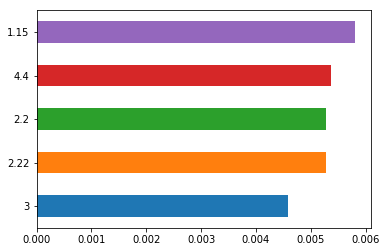

In [24]:
#This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) 
#on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
X_imp = data_dnazscore.iloc[:,:-1]
y_imp = data_dnazscore.iloc[:,-1]
model.fit(X_imp,y_imp)
#Return the feature importances (the higher, the more important the feature).
feat_importances = pd.Series(model.feature_importances_, index=X_imp.columns)
print(model.feature_importances_)
feat_importances.nsmallest(5).plot(kind='barh')
plt.show()

C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jatin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

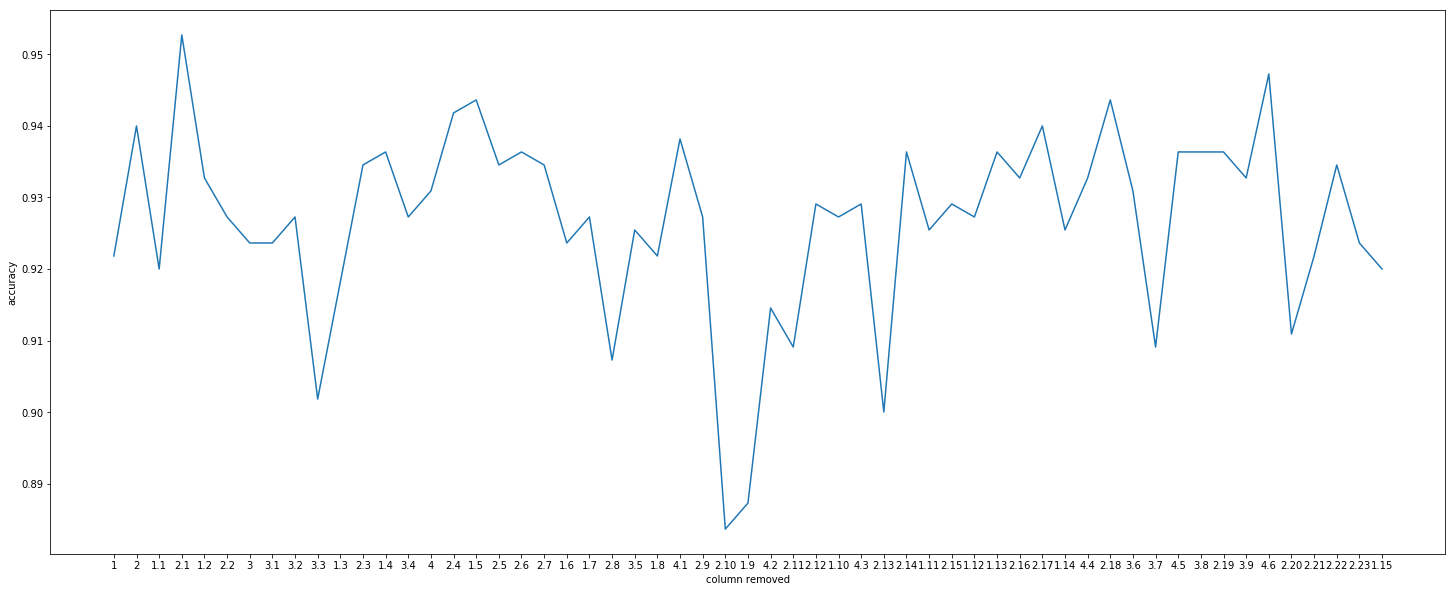

[0.9418181818181818, 0.9436363636363636, 0.9436363636363636, 0.9472727272727273, 0.9527272727272728]
columns removed: ['2.1', '2.4', '1.5', '2.18', '4.6']


In [23]:
acc = []
columns_rem = []
for col in data_dnazscore.columns:
    #print("col: ", col)
    if(col != "1.16"):
        data_dnazscore1 = data_dnazscore.drop(col, axis=1)
        x_train_dna,x_test_dna,y_train_dna,y_test_dna=train_test_split(data_dnazscore1.iloc[:,:-1],data_dnazscore1.iloc[:,-1], random_state=21)
        RF_dna=RandomForestClassifier()
        RF_dna.fit(x_train_dna,y_train_dna)
        y_rfdna_pred=RF_dna.predict(x_test_dna)
        columns_rem.append(col)
        acc.append(accuracy_score(y_test_dna,y_rfdna_pred))

plt.figure(1, figsize=(25, 10))
plt.plot(columns_rem,acc)
plt.xlabel("column removed")
plt.ylabel("accuracy")
plt.show()
import operator
index, value = max(enumerate(acc), key=operator.itemgetter(1))
max_5_acc = sorted(acc)[-5:]
coll = []
for i in range(0,len(acc)):
    if(acc[i] in max_5_acc):
        coll.append(columns_rem[i])
print(sorted(acc)[-5:])
print("columns removed:",coll)

### Classification using 2 features -
 <p>From the above pairplots it can be seen that the datapoints for the 2 classes are overlapping, i.e., there does not exist any 2 features/dimensions that can separate the 2 classes. It is shown below that the accuracy of random forest, which performs best when we consider all features, is ~50% when we train our classifier using only 2 dimensions</p>

In [40]:
x_train_dna2 = x_train_dna.iloc[:,1:3]
RF_dna=RandomForestClassifier()
RF_dna.fit(x_train_dna2,y_train_dna)
y_rfdna_pred=RF_dna.predict(x_test_dna.iloc[:,1:3])
print(classification_report(y_test_dna,y_rfdna_pred))

              precision    recall  f1-score   support

          -1       0.54      0.26      0.35       260
           1       0.55      0.80      0.65       290

   micro avg       0.55      0.55      0.55       550
   macro avg       0.55      0.53      0.50       550
weighted avg       0.55      0.55      0.51       550



C:\Windows\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
